In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
data = pd.read_csv("./dataset/cleaned_news_summary.csv")
data.head()

,Unnamed: 0,author,date,headlines,read_more,text,ctext,cleaned_text,cleaned_headline
0,0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in offices order,http://www.hindustantimes.com/india-news/rakshabandhan-compulsory-in-daman-and-diu-women-employees-to-tie-rakhis-to-male-colleagues/story-E5h5U1ZDJii5zFpLXWRkhJ.html?utm_source=inshorts&utm_medium...,The Administration of Union Territory Daman and Diu has revoked its order that made it compulsory for women to tie rakhis to their male colleagues on the occasion of Rakshabandhan on August 7. The...,The Daman and Diu administration on Wednesday withdrew a circular that asked women staff to tie rakhis on male colleagues after the order triggered a backlash from employees and was ripped apart o...,administration union territory daman diu revoked order made compulsory women tie rakhis male colleagues occasion rakshabandhan august administration forced withdraw decision within 24 hours issuin...,start daman diu revokes mandatory rakshabandhan in offices order end
1,1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorcing rich man',http://www.hindustantimes.com/bollywood/malaika-arora-khan-was-trolled-for-divorcing-a-rich-man-her-reply-is-dignity-itself/story-oIPZNI9deImCmabLMMwR2H.html?utm_source=inshorts&utm_medium=referra...,"Malaika Arora slammed an Instagram user who trolled her for ""divorcing a rich man"" and ""having fun with the alimony"". ""Her life now is all about wearing short clothes, going to gym or salon, enjoy...","From her special numbers to TV?appearances, Bollywood actor Malaika Arora Khan has managed to carve her own identity. The actor, who made her debut in the Hindi film industry with the blockbuster ...",malaika arora slammed instagram user trolled divorcing rich man fun alimony life wearing short clothes going gym salon enjoying vacations user commented malaika responded certainly got get damn fa...,start malaika slams user who trolled her for divorcing rich man end
2,2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS' form,http://www.hindustantimes.com/patna/bihar-igims-form-loses-virginity-after-row-opts-for-unmarried-instead/story-8XmHIg39otGBoZAYEBQxMK.html?utm_source=inshorts&utm_medium=referral&utm_campaign=ful...,"The Indira Gandhi Institute of Medical Sciences (IGIMS) in Patna on Thursday made corrections in its Marital Declaration Form by changing 'Virgin' option to 'Unmarried'. Earlier, Bihar Health Mini...","The Indira Gandhi Institute of Medical Sciences (IGIMS) in Patna amended its marital declaration form on Thursday, replacing the word ?virgin? with ?unmarried? after controversy.Until now, new rec...",indira gandhi institute medical sciences igims patna thursday made corrections marital declaration form changing virgin option unmarried earlier bihar health minister defined virgin unmarried woma...,start virgin now corrected to unmarried in igims form end
3,3,Sumedha Sehra,"03 Aug 2017,Thursday",Aaj aapne pakad liya: LeT man Dujana before being killed,http://indiatoday.intoday.in/story/abu-dujana-last-phone-call-lashkar-e-taiba-jammu-and-kashmir/1/1017550.html?utm_source=inshorts&utm_medium=referral&utm_campaign=fullarticle,"Lashkar-e-Taiba's Kashmir commander Abu Dujana, who was killed by security forces, said ""Kabhi hum aage, kabhi aap, aaj aapne pakad liya, mubarak ho aapko (Today you caught me. Congratulations)"" a...","Lashkar-e-Taiba's Kashmir commander Abu Dujana was killed in an encounter in a village in Pulwama district of Jammu and Kashmir earlier this week. Dujana, who had managed to give the security forc...",lashkaretaibas kashmir commander abu dujana killed security forces said kabhi hum aage kabhi aap aaj aapne pakad liya mubarak ho aapko today caught congratulations caught added wont surrender what...,start aaj aapne pakad liya let man dujana before being killed end
4,4,Aarushi Maheshwari,"03 Aug 2017,Thursday",Hotel staff to get t

In [27]:
news = data.cleaned_text
headline = data.cleaned_headline
news_len = []
headline_len = []
for obj in range(len(news)):
    news_len.append(len(news[obj].split()))
    headline_len.append(len(headline[obj].split()))

In [28]:
max(news_len)

47

Text(0.5, 1.0, 'Distribution of length of news text')

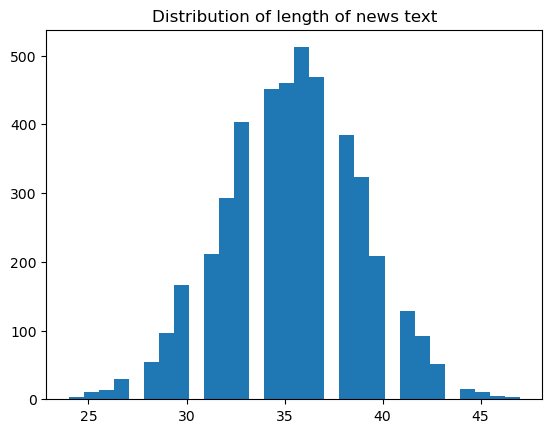

In [29]:
plt.hist(news_len, bins=30)
plt.title("Distribution of length of news text")

Text(0.5, 1.0, 'Distribution of length of headline text')

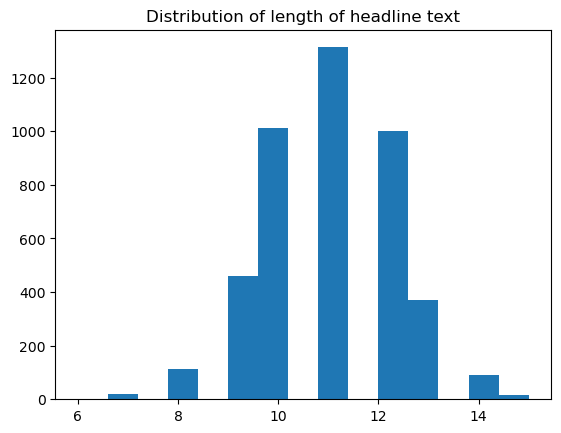

In [30]:
plt.hist(headline_len, bins=15)
plt.title("Distribution of length of headline text")

In [31]:
max_len_news = 47
max_len_headline = 13

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.cleaned_text, data.cleaned_headline, test_size=0.2, random_state=101, shuffle=True)

In [33]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, TimeDistributed, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from attention_my import AttentionLayer


import warnings

pd.set_option('display.max_colwidth', 200)
warnings.filterwarnings('ignore')

In [34]:
X_train

742     new airport project navi mumbai take away 250 hectares forest land 106 hectares mangrove cover mangrove saplings planted across 160 hectares play crucial role stabilising coastlines rehabilitation...
1776    according reports actor shahid kapoor admitted starstruck twinkle khanna teenager reportedly revealed would wait hours catch glimpse twinkle hotel swimming pool shoot 1997 film itihaas shahids mot...
24      two sunbathers 56yearold man eightyearold girl killed wednesday light plane struck making emergency landing beach portugal others run sea save two occupants plane appeared difficulty partly broken...
3383    election commission said thursday hold open hackathon last week may allowing people try hack evms announcement comes amid various political parties leaders alleging tampering evms elections ec ear...
2674    panchayat village rajasthan issued order prohibiting girls wearing jeans keeping mobile phones panchayat also decided dispute regarding order would referred pan

In [35]:
X_tokenizer = Tokenizer()
X_tokenizer.fit_on_texts(list(X_train))
X_train = X_tokenizer.texts_to_sequences(X_train)
X_test = X_tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train, maxlen = max_len_news, padding='post')
X_test = pad_sequences(X_test, maxlen = max_len_news, padding='post')

news_vocab_size = len(X_tokenizer.word_index) + 1

In [36]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_train))

y_train = y_tokenizer.texts_to_sequences(y_train)
y_test = y_tokenizer.texts_to_sequences(y_test)

y_train = pad_sequences(y_train, maxlen=max_len_headline, padding='post')
y_test = pad_sequences(y_test, maxlen=max_len_headline, padding='post')

In [37]:
y_voc_size = len(y_tokenizer.word_index) + 1

In [38]:
from keras import backend as K
K.clear_session()

latent_dim=500

enc_inputs = Input(shape=(max_len_news,))
embedding1 = Embedding(news_vocab_size,latent_dim)(enc_inputs)

lstm1 = LSTM(latent_dim, return_sequences=True, return_state=True)
enc_output1, h1, c1 = lstm1(embedding1)

lstm2 = LSTM(latent_dim, return_sequences=True,return_state=True)
enc_output2, h2, c2 = lstm2(enc_output1)

lstm3 = LSTM(latent_dim, return_sequences=True,return_state=True)
enc_outputs, h3, c3 = lstm3(enc_output2)


decoder_inputs = Input(shape=(None, ))
dec_embedding = Embedding(y_voc_size, latent_dim)
dec_emb_out = dec_embedding(decoder_inputs)

dec_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, fwd_state, back_state = dec_lstm(dec_emb_out, initial_state = [h3, c3])



attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_state = attn_layer([enc_outputs, decoder_outputs])

decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

model = Model([enc_inputs, decoder_inputs], decoder_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 47)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 47, 500)      9732000     ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    [(None, 47, 500),    2002000     ['embedding[0][0]']              
                                 (None, 500),                                                     
                                 (None, 500)]                                                     
                                                                                              

In [39]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [40]:
ea = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [41]:

history=model.fit([X_train,y_train[:,:-1]], y_train.reshape(y_train.shape[0],y_train.shape[1], 1)[:,1:] ,epochs=15,batch_size=512, callbacks=[ea], validation_data=([X_test,y_test[:,:-1]], y_test.reshape(y_test.shape[0],y_test.shape[1], 1)[:,1:]))

Epoch 1/15
7/7 [==============================] - 189s 27s/step - loss: 8.7117 - val_loss: 6.3876
Epoch 2/15
7/7 [==============================] - 184s 27s/step - loss: 6.7301 - val_loss: 5.8172
Epoch 2: early stopping


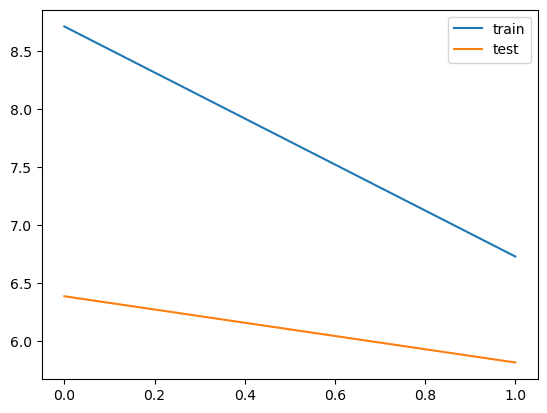

In [42]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()


In [43]:
reverse_target_word_index = y_tokenizer.index_word
reverse_news_words_index = X_tokenizer.index_word
target_word_index = y_tokenizer.word_index


In [44]:
encoder_model = Model(inputs = enc_inputs, outputs = [enc_outputs, h3, c3])

decoder_h = Input(shape=(latent_dim,))
decoder_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_news, latent_dim))


dec_emb2 = dec_embedding(decoder_inputs)

dec_output2, dec_h2, dec_c2 = dec_lstm(dec_emb2, initial_state=[decoder_h, decoder_c])




attn_out_inf, attn_state_inf = attn_layer([decoder_hidden_state_input, dec_output2])

dec_inf_concat = Concatenate(axis=-1, name='concat')([dec_output2, attn_out_inf])


dec_output2 = decoder_dense(dec_inf_concat)


decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input, decoder_h, decoder_c], [dec_output2] + [dec_h2, dec_c2])

In [45]:
decoder_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, None, 500)    3880000     ['input_2[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, 500)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 500)]        0           []                               
                                                                                            

In [46]:
def decode_sequence(input_sequence):
    e_out, e_h, e_c = encoder_model(input_sequence)

    target_seq = np.zeros((1,1))

    target_seq[0,0] = target_word_index['start']

    stop_condition = False


    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        
        sample_token_index = np.argmax(output_tokens[0,-1,:])
        print(sample_token_index)
        sampled_token = reverse_target_word_index[sample_token_index]

        if sampled_token!='end':
            decoded_sentence+= ' ' + sampled_token

        if (sampled_token=='end' or len(decoded_sentence.split())>=(max_len_headline-1)):
            stop_condition = True

        target_seq = np.zeros((1,1))

        target_seq[0,0] = sample_token_index


        e_h, e_c = h, c

    return decoded_sentence


In [47]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_news_words_index[i]+' '
    return newString

In [48]:
for i in range(len(X_test)):
  print("Review:",seq2text(X_test[i]))
  print("Original summary:",seq2summary(y_test[i]))
  print("Predicted summary:",decode_sequence(X_test[i].reshape(1,max_len_news)))
  print("\n")

Review: bjp office imphal attacked unknown people wednesday broke left office bad condition party alleged miscreants also shouting antibjp slogans belonged congress bjp said take matter public instead reporting police 
Original summary: bjp office attacked in manipur party blames congress 
1/1 [==============================] - 1s 910ms/step
3
1/1 [==============================] - 0s 57ms/step
3
1/1 [==============================] - 0s 41ms/step
3
1/1 [==============================] - 0s 40ms/step
3
1/1 [==============================] - 0s 50ms/step
3
1/1 [==============================] - 0s 45ms/step
3
1/1 [==============================] - 0s 49ms/step
3
1/1 [==============================] - 0s 37ms/step
3
1/1 [==============================] - 0s 50ms/step
3
1/1 [==============================] - 0s 48ms/step
0


KeyError: 0

In [ ]:
reverse_target_word_index

{1: 'start',
 2: 'end',
 3: 'to',
 4: 'in',
 5: 'for',
 6: 'of',
 7: 'on',
 8: 'delhi',
 9: 'at',
 10: 'from',
 11: 'with',
 12: 'after',
 13: 'india',
 14: 'by',
 15: 'over',
 16: 'be',
 17: 'govt',
 18: 'as',
 19: 'not',
 20: 'up',
 21: 'is',
 22: 'man',
 23: 'the',
 24: 'mumbai',
 25: 'bjp',
 26: 'against',
 27: 'will',
 28: 'indian',
 29: 'report',
 30: 'modi',
 31: 'pm',
 32: 'us',
 33: 'was',
 34: 'cr',
 35: 'police',
 36: 'his',
 37: 'crore',
 38: 'woman',
 39: 'film',
 40: 'cm',
 41: 'new',
 42: 'case',
 43: 'arrested',
 44: 'no',
 45: 'lakh',
 46: 'who',
 47: 'it',
 48: 'first',
 49: 'sc',
 50: 'ban',
 51: 'indias',
 52: 'says',
 53: 'people',
 54: 'aap',
 55: 'pak',
 56: 'and',
 57: 'my',
 58: 'get',
 59: 'reports',
 60: 'st',
 61: 'out',
 62: 'women',
 63: 'has',
 64: 'trump',
 65: 'if',
 66: 'attack',
 67: 'years',
 68: 'air',
 69: 'can',
 70: 'kejriwal',
 71: 'have',
 72: 'me',
 73: 'china',
 74: 'hc',
 75: 'gets',
 76: 'jk',
 77: 'her',
 78: 'may',
 79: 'chief',
 80: 'ask

In [74]:
x = np.array([5,4,3,2,1])

In [75]:
np.argmax(x)

0